<a href="https://colab.research.google.com/github/esrayuzgec/parkinsonvsalz/blob/main/3class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
!pip install timm
import timm
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"esrayuzgec","key":"49f0db0ca0e7ac60ce926c0e1460c4b6"}'}

In [5]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘–p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:

!kaggle datasets download -d farjanakabirsamanta/alzheimer-diseases-3-class

alzheimer-diseases-3-class.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:

from zipfile import ZipFile
file_name="alzheimer-diseases-3-class.zip"

In [8]:

with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')
     

done


In [9]:
from fastai.vision.all import *

In [10]:
path= Path('/content/3_cls/train')

In [11]:
all_files= get_image_files(path)


In [12]:

from fastai.vision.augment import contrast
tfms = aug_transforms(size=512, 
                      min_scale=0.25,
                      do_flip=False,
                      flip_vert=False,
                      max_rotate=0,
                      max_warp=0,
                    
                      max_zoom=0.50,
                      max_lighting=0.70,
                      p_lighting=0.60
                      
                      )
     

In [13]:

dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.1),
                 get_y=parent_label,
                 item_tfms=Resize(256,method='squish'),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
)

In [14]:
dls= dblock.dataloaders(all_files)


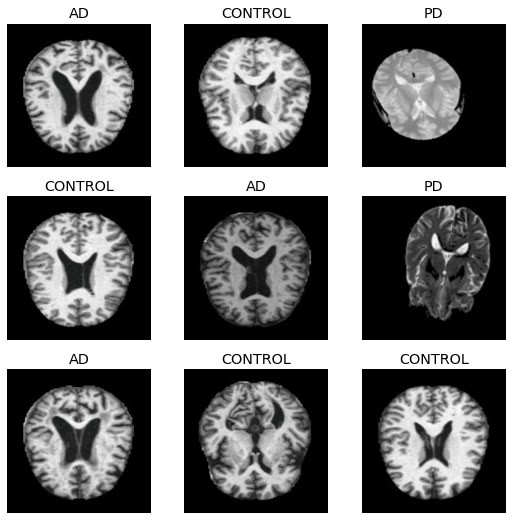

In [15]:
dls.show_batch()

In [16]:
print("Number of examples in testing:", len(dls.valid_ds))


Number of examples in testing: 647


In [17]:
learn = vision_learner(dls, resnet18,metrics=accuracy)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0005754399462603033)

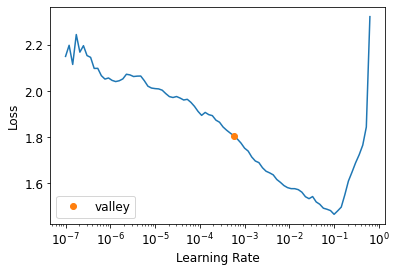

In [18]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(100,1.8e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.278555,0.804476,0.698609,00:22
1,1.104602,0.704852,0.723338,00:22
2,0.940185,0.614667,0.741886,00:21
3,0.852713,0.561253,0.751159,00:22
4,0.751843,0.543503,0.775889,00:22
5,0.636423,0.483071,0.797527,00:22
6,0.561552,0.445727,0.825348,00:22
7,0.505665,0.428913,0.829985,00:22
8,0.447123,0.371873,0.846986,00:22
9,0.380139,0.375441,0.854714,00:22


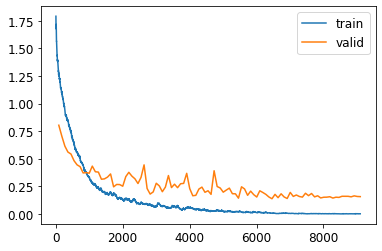

In [20]:
learn.recorder.plot_loss()

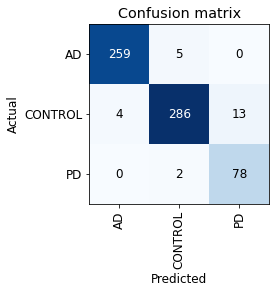

In [21]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
     

In [22]:

interp.print_classification_report()

              precision    recall  f1-score   support

          AD       0.98      0.98      0.98       264
     CONTROL       0.98      0.94      0.96       303
          PD       0.86      0.97      0.91        80

    accuracy                           0.96       647
   macro avg       0.94      0.97      0.95       647
weighted avg       0.96      0.96      0.96       647



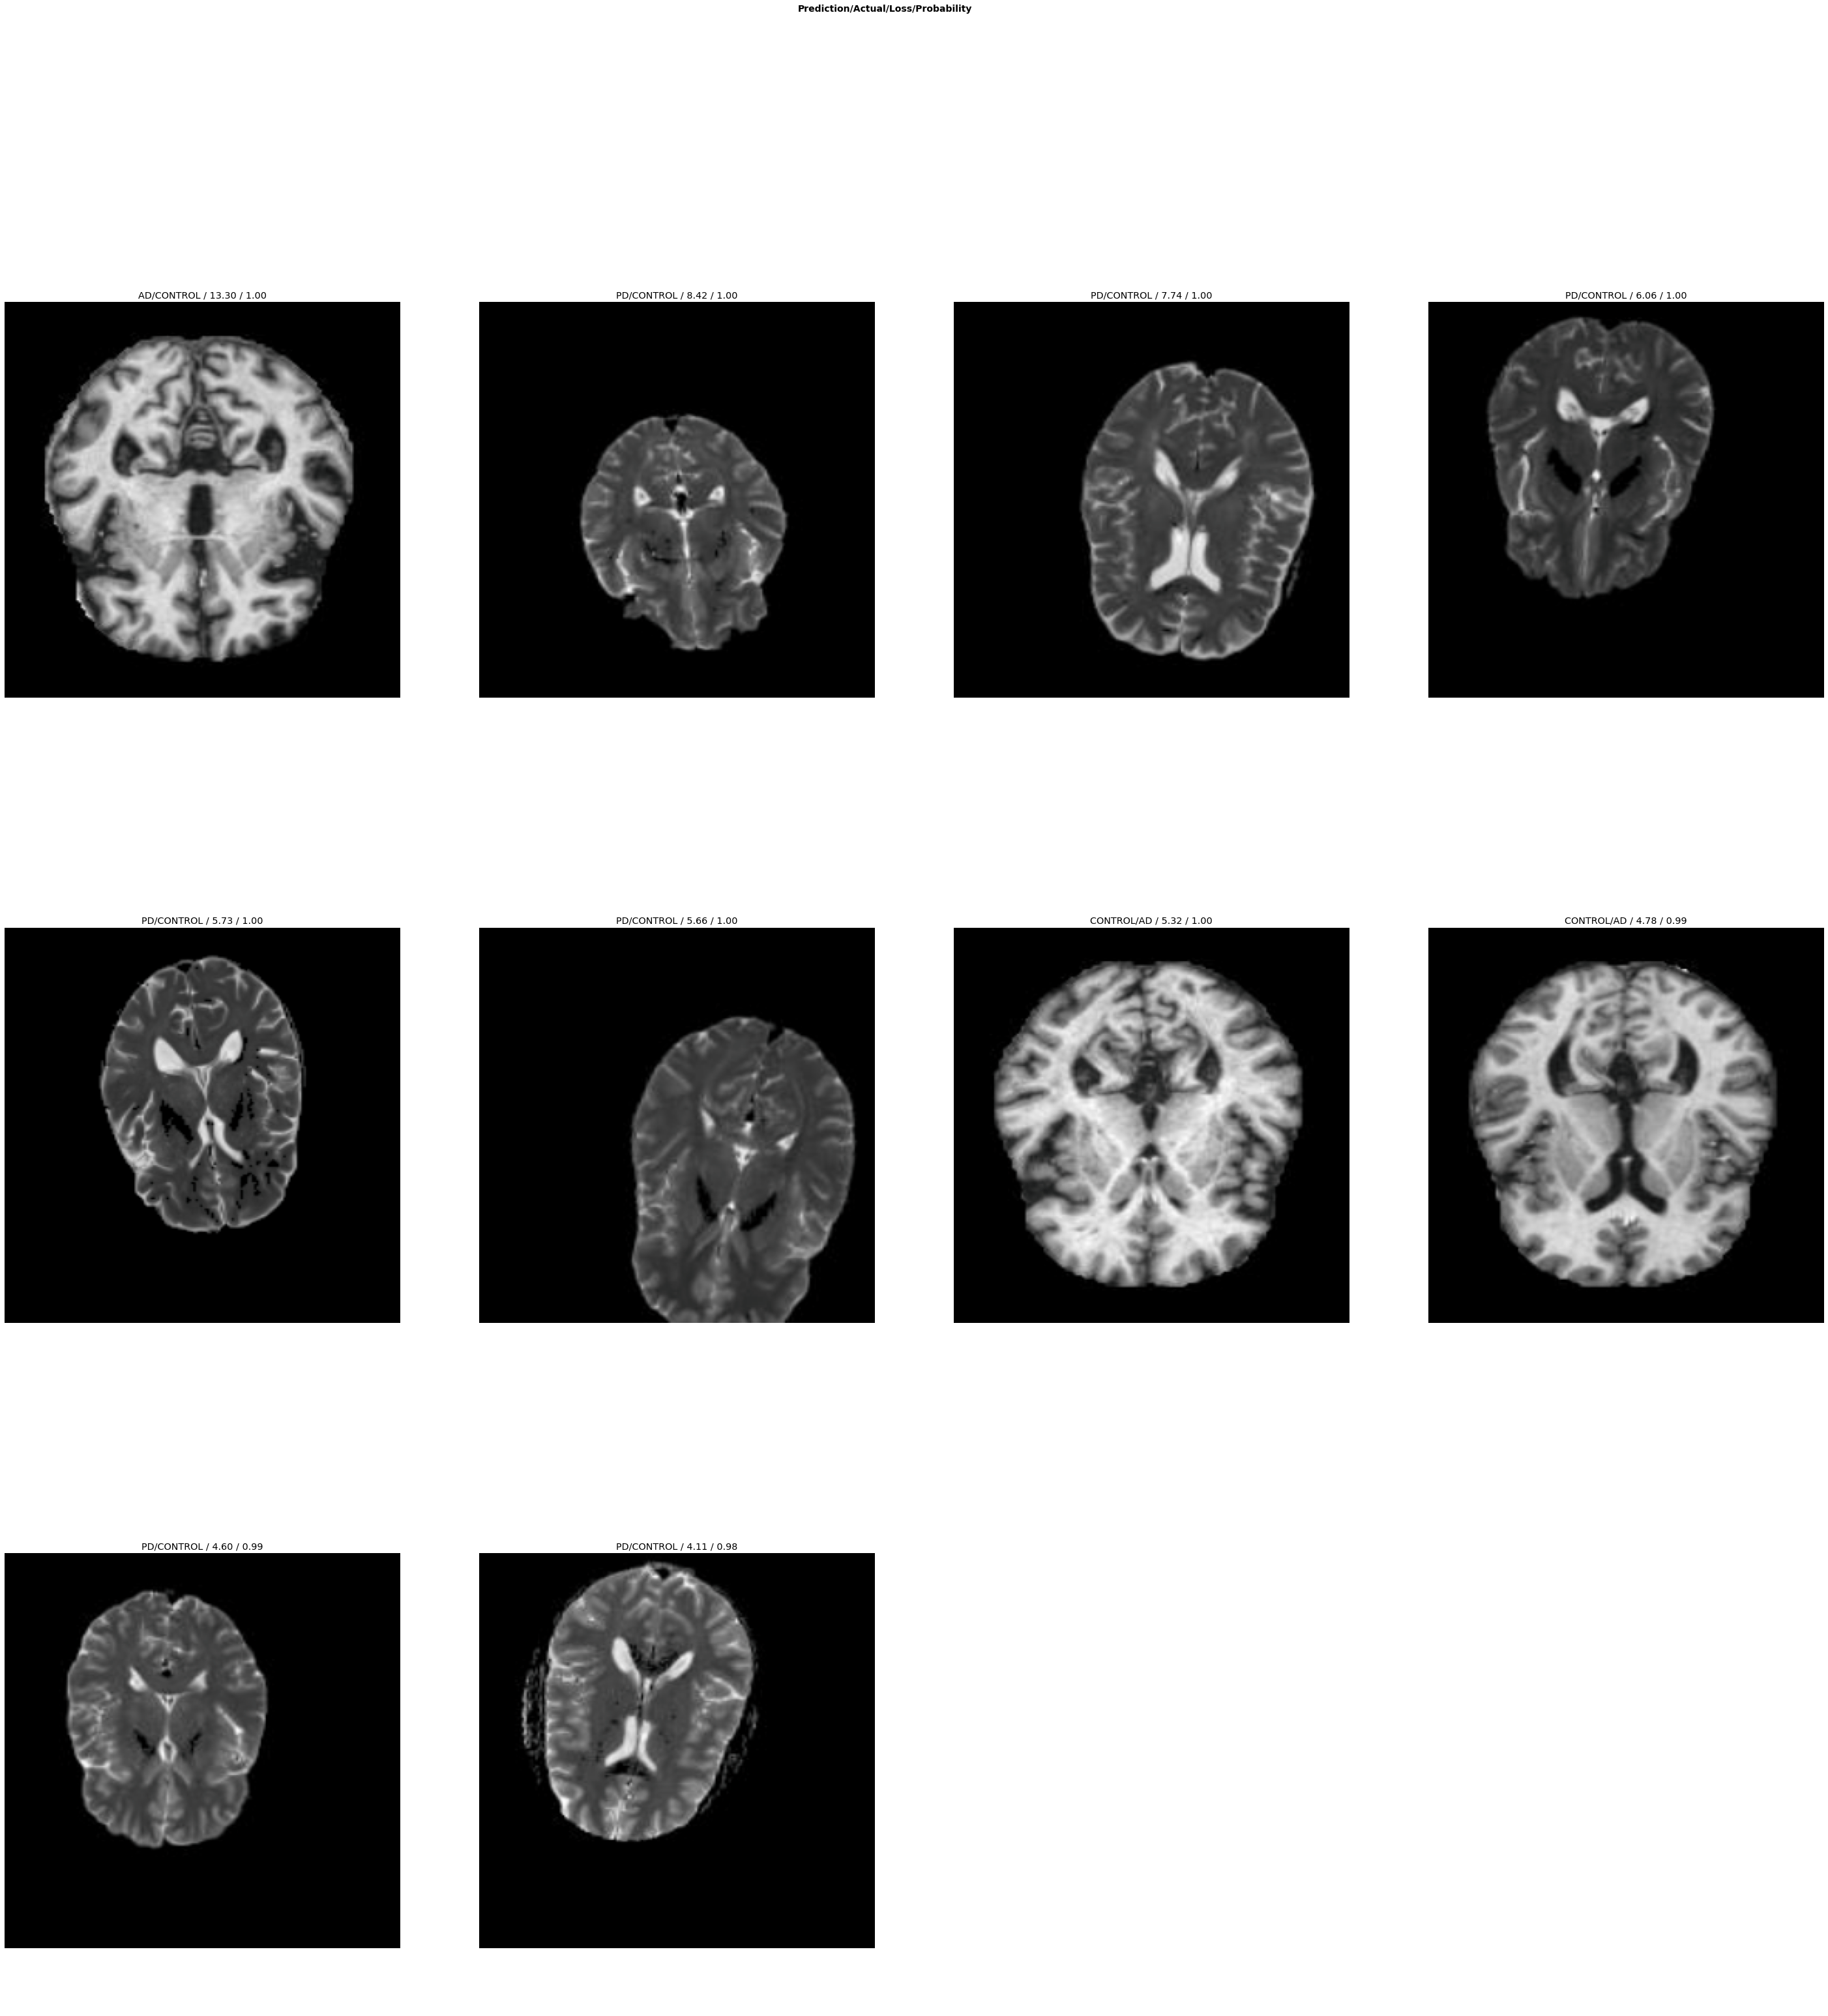

In [23]:
interp.plot_top_losses(10, figsize=(50,50))

In [24]:
path_save= Path('/content/gdrive/MyDrive')

In [26]:
learn.save(path_save/'AlzPark_ResNet18_Train')

Path('/content/gdrive/MyDrive/AlzPark_ResNet18_Train.pth')

In [27]:

learn.export(path/'AlzPark_ResNet18_Train.pkl')